**IMPORTAMOS LAS LIBRERIAS**

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import csv
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import copy

**LEEMOS EL DATASET**

In [ ]:
df=pd.read_csv('/content/emails.csv')

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


Verificamos los datos no nulos


In [ ]:
df.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [ ]:
df.info()#obtenemos la informacion dde las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
df.describe().T#obtenemos un analisis estadistico de las columnas

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


Text(0, 0.5, 'frecuencia')

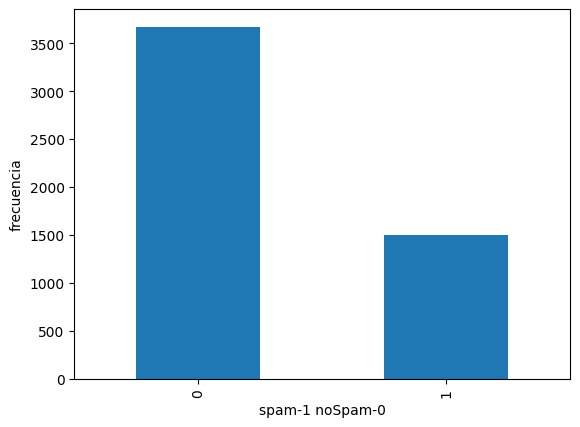

In [ ]:
etiquetas=df['Prediction'].value_counts()
etiquetas.plot(kind='bar')
plt.xlabel("spam-1 noSpam-0")
plt.ylabel("frecuencia")

Text(0, 0.5, 'frecuencia')

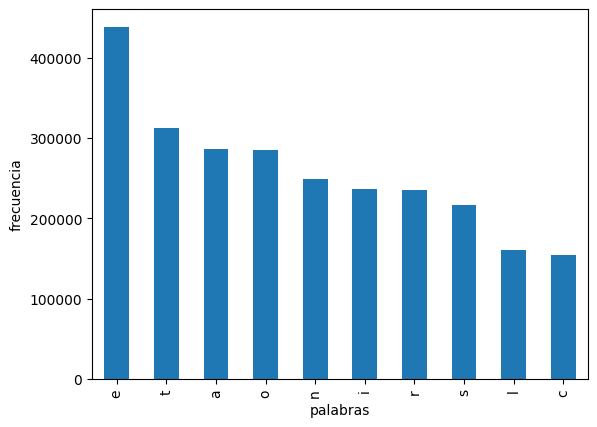

In [ ]:
palabras = df.iloc[:, 1:-1].sum()#obtenemos la suma de palabras en todos los correos electronicos
top_palabras=palabras.nlargest(10)#obtenemos las 10 palabras que mas se repiten
#palabras
top_palabras.plot(kind='bar')
plt.xlabel("palabras")
plt.ylabel('frecuencia')

**NORMALIZACION DE LOS DATOS**

In [ ]:
palabras_sin_normalizar=df.columns[1:-1]
#usaremos minmaxscaler para normalizar los datos
scaler = MinMaxScaler()
scaler.fit(df[palabras_sin_normalizar])#se ajusta el escalador a los datos
df[palabras_sin_normalizar] = scaler.transform(df[palabras_sin_normalizar])# se aplica la normalizacion a los datos
df[palabras_sin_normalizar]


,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001054,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.038095,0.098485,0.067055,0.067416,0.127660,0.025974,0.053741,0.014286,0.161677,0.080717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004215,0.000000,0.000000,0.017937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.037879,0.061224,0.000000,0.106383,0.012987,0.026870,0.028571,0.059880,0.004484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.033333,0.045455,0.046647,0.011236,0.106383,0.025974,0.030032,0.000000,0.053892,0.013453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0.009524,0.015152,0.002915,0.033708,0.000000,0.000000,0.016860,0.000000,0.000000,0.022422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5168,0.166667,0.204545,0.029155,0.022472,0.127660,0.064935,0.079557,0.057143,0.017964,0.103139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0
5169,0.000000,0.000000,0.000000,0.011236,0.000000,0.000000,0.005796,0.000000,0.000000,0.004484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5170,0.009524,0.053030,0.000000,0.000000,0.042553,0.012987,0.014752,0.028571,0.000000,0.035874,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0


In [ ]:
df.describe().T#analisis estadistico de las variables

,count,mean,std,min,25%,50%,75%,max
the,5172.0,0.031622,0.055929,0.0,0.000000,0.014286,0.038095,1.0
to,5172.0,0.046880,0.072232,0.0,0.007576,0.022727,0.053030,1.0
ect,5172.0,0.012081,0.041111,0.0,0.000000,0.000000,0.008746,1.0
and,5172.0,0.034557,0.067932,0.0,0.000000,0.011236,0.033708,1.0
for,5172.0,0.066483,0.099586,0.0,0.021277,0.042553,0.085106,1.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.001643,0.034727,0.0,0.000000,0.000000,0.000000,1.0
allowing,5172.0,0.001353,0.024048,0.0,0.000000,0.000000,0.000000,1.0
ff,5172.0,0.008024,0.024388,0.0,0.000000,0.000000,0.008772,1.0
dry,5172.0,0.001740,0.024521,0.0,0.000000,0.000000,0.000000,1.0


observamos que los datos ya se encuentran normalizados

**Preparacion de datos para el modelo**

In [ ]:
# dividimos  los datos en características (X) y etiquetas (y)
X = df.iloc[:, 1:-1]
y = df['Prediction']

In [ ]:
# dividimos los datos en conjuntos de entrenamiento y prueba
#vamos a separar los datos en 80% para el entrenamiento y 20% para prueba del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Entrenamiento del modelo**

In [ ]:
# creamos una instancia del clasificador Naive Bayes
classifier = MultinomialNB()

In [ ]:
# Entrenamos el clasificador utilizando el conjunto de entrenamiento
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:

# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)

In [ ]:
# Calcular la precisión del clasificador
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador Naive Bayes:", accuracy)

Precisión del clasificador Naive Bayes: 0.9391304347826087
